In [64]:
import pandas as pd
import numpy as np
import requests
import json

In [65]:
url = "https://basketball-highlights-api.p.rapidapi.com/countries"

querystring = {"query":"Phone","page":"1","country":"US"}

headers = {
	"X-RapidAPI-Key": "SIGN-UP-FOR-KEY",
	"X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'message': 'You are not subscribed to this API.'}


In [66]:
df = pd.read_excel('Air_BNB.xlsx')

In [67]:
df.head(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,1.0,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3.0,1.0,moderate,1.0,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2.0,1.0,moderate,1.0,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2.0,1.0,moderate,1.0,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2.0,1.0,moderate,1.0,t,90.0,1.0,1.0,3.583519


In [68]:
10**5.010635

102479.0285827062

In [69]:
print("No. of Rows :",df.shape[0])
print("No. of Columns :",df.shape[1])

No. of Rows : 74111
No. of Columns : 11


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  float64
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.2+ MB


In [71]:
round(df.drop('id',axis=1).describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [72]:
df['cancellation_policy'].nunique()

3

In [73]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

In [74]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [75]:
df.drop_duplicates()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [76]:
df.drop('id',axis=1,inplace=True)

## Counting the Null Values

In [77]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [78]:
round(df.isnull().sum() * 100/df.shape[0],2)

room_type                0.01
accommodates             0.00
bathrooms                0.27
cancellation_policy      0.01
cleaning_fee             0.01
instant_bookable         0.00
review_scores_rating    22.56
bedrooms                 0.12
beds                     0.18
log_price                0.00
dtype: float64

In [136]:
df_mean = df.copy()

In [80]:
df_median = df.copy()
df_pred = df.copy()

## Mean Imputation

In [137]:
cat = []
num = []
for i in df_mean.columns:
    if df_mean[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)    

In [138]:
cat

['room_type', 'cancellation_policy', 'instant_bookable']

In [139]:
num

['accommodates',
 'bathrooms',
 'cleaning_fee',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [140]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [141]:
df_mean.isnull().sum()

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [86]:
for column in df_mean.columns:
    if df_mean[column].dtype == 'object':
        mode = df[column].mode()
        df_mean[column] = df_mean[column].fillna(mode)

In [145]:
df_mean.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [143]:
df_mean['room_type'] = df_mean['room_type'].fillna('Entire home/apt')

In [144]:
df_mean['cancellation_policy'] = df_mean['cancellation_policy'].fillna('strict')

## Median Imputation

In [90]:
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_median[column].median()
        df_median[column] = df_median[column].fillna(median)

In [91]:
for column in df_median.columns:
    if df_median[column].dtype == 'object':
        mode = df_median[column].mode()[0]
        df_median[column] = df_median[column].fillna(mode)

In [92]:
df_median.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

## KNN Imputer

In [118]:
df_pred[cat].isnull().sum()

room_type              5
cancellation_policy    8
instant_bookable       0
dtype: int64

In [116]:
from sklearn.impute import KNNImputer

In [122]:
df_pred

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [119]:
df_pred['room_type'] = df_pred['room_type'].fillna('Entire home/apt')

In [121]:
df_pred['cancellation_policy'] = df_pred['cancellation_policy'].fillna('strict')

In [126]:
df_pred[cat].isnull().sum()

room_type              0
cancellation_policy    0
instant_bookable       0
dtype: int64

In [125]:
for feature in df_pred.columns: 
    if df_pred[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_pred[feature].unique()))
        print(pd.Categorical(df_pred[feature].unique()).codes)
        df_pred[feature] = pd.Categorical(df_pred[feature]).codes



feature: room_type
['Entire home/apt', 'Private room', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
[0 1 2]


feature: cancellation_policy
['strict', 'moderate', 'flexible']
Categories (3, object): ['flexible', 'moderate', 'strict']
[2 1 0]


feature: instant_bookable
['f', 't']
Categories (2, object): ['f', 't']
[0 1]


In [129]:
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_pred)
df_pred = pd.DataFrame(data = df_imputed,columns=df_pred.columns)

In [132]:
df_pred.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# Exploratory Data Analytics

# Univariate Analysis

In [146]:
df_mean

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.000000,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.000000,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.000000,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,94.067365,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.000000,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,94.067365,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.000000,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.000000,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,94.067365,0.0,2.0,5.273000


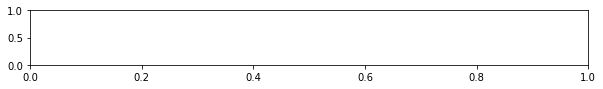

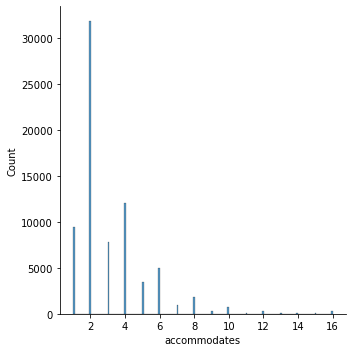

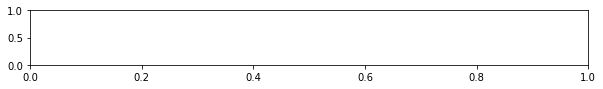

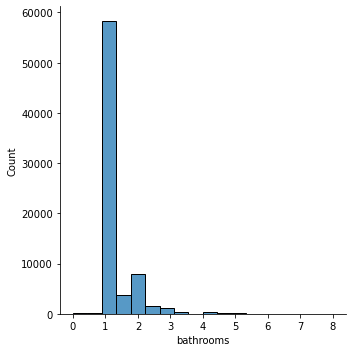

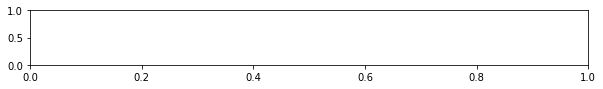

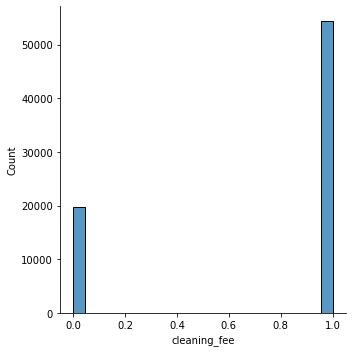

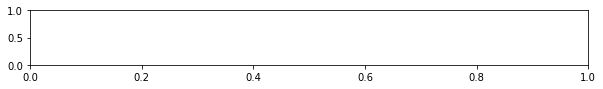

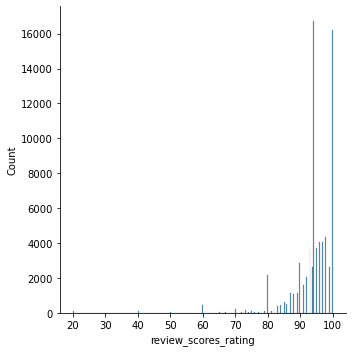

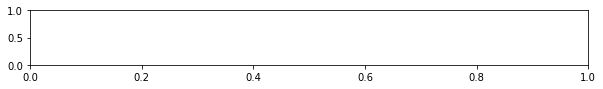

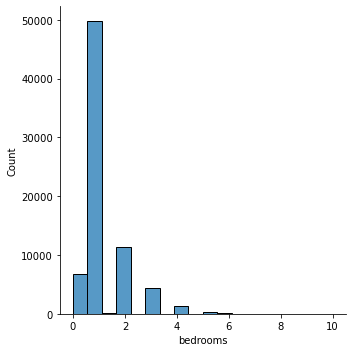

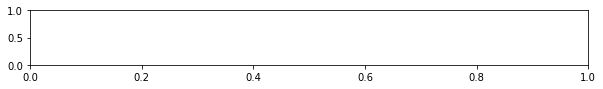

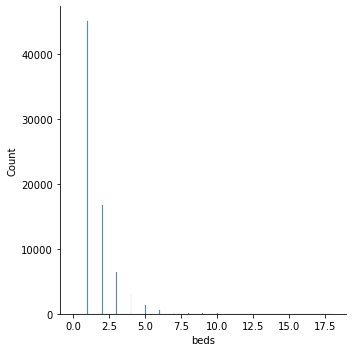

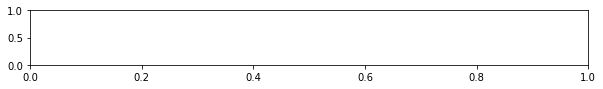

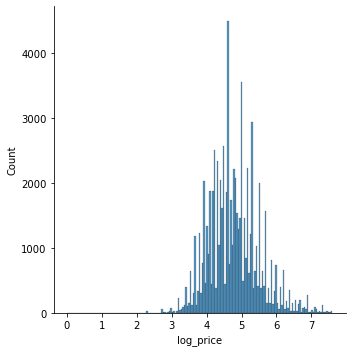

In [133]:
for i in num:
    fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(10,1))
    sns.displot(df_mean[i])

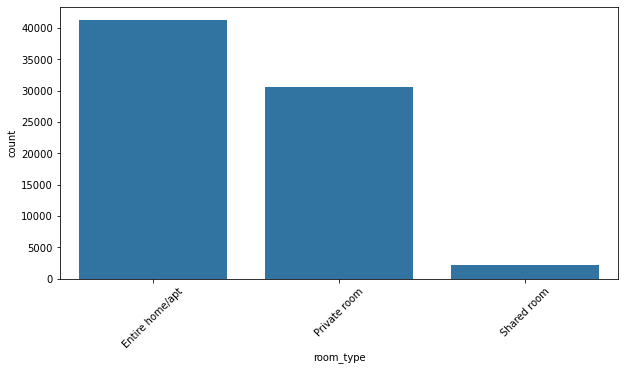

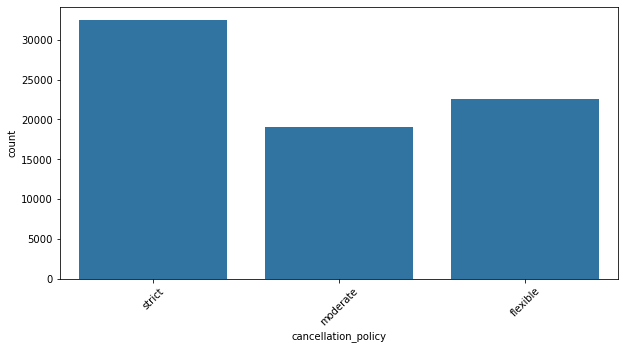

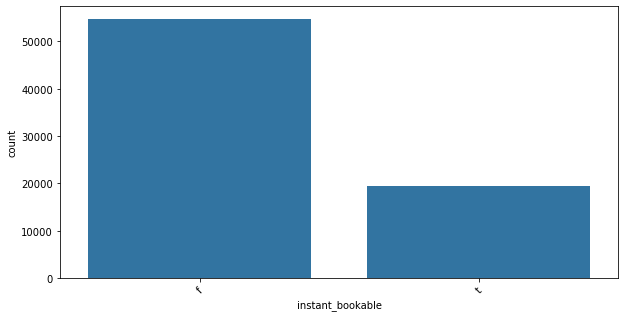

In [149]:
for i in df_mean[cat]:
    fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
    plt.xticks(rotation=45)
    sns.countplot(x=df_mean[i],data=df_mean[cat])    

## Bivariate Analysis

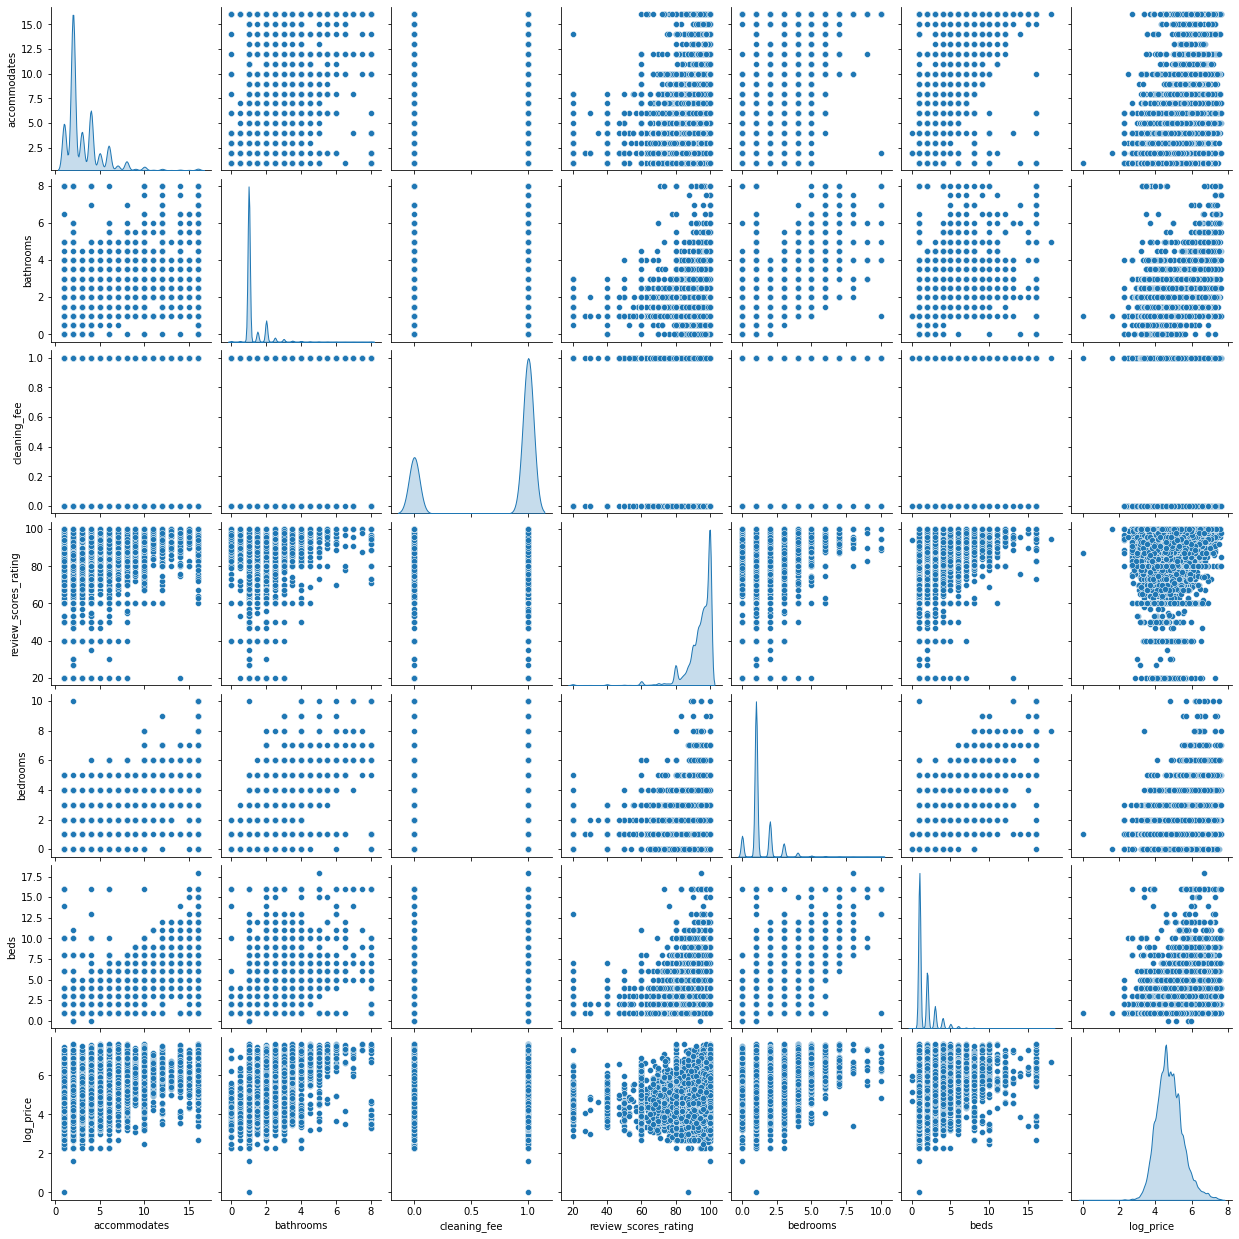

In [151]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

<AxesSubplot:>

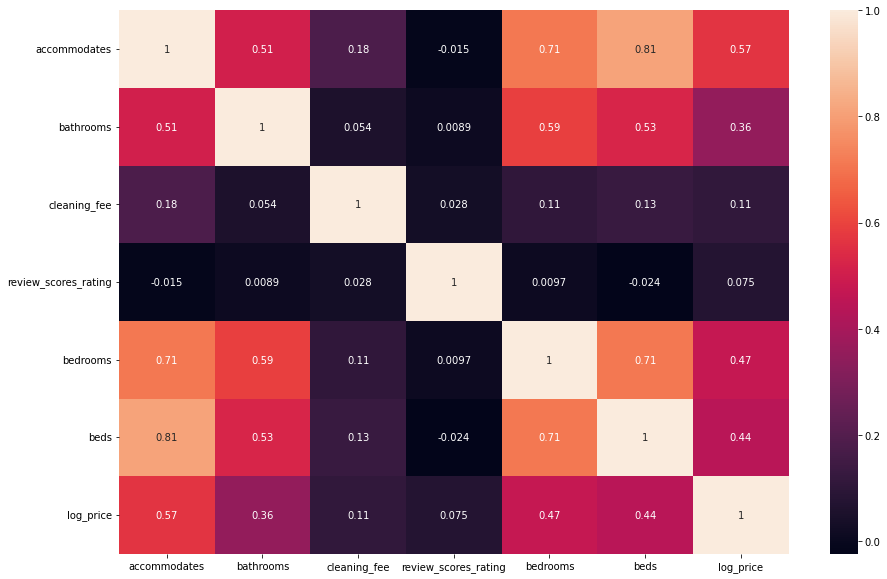

In [154]:
plt.figure(figsize=(15,10))
sns.heatmap(df_mean[num].corr(),annot=True)

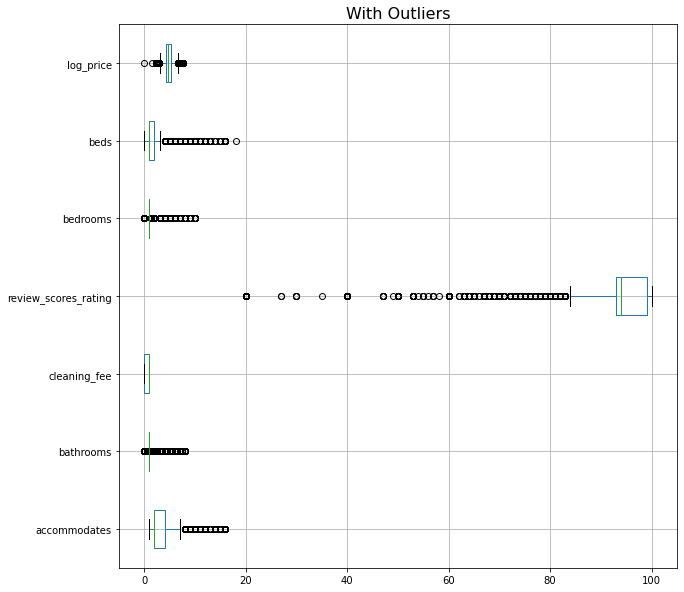

In [155]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()